## Fourier series and Data encoding for QML

In this notebook, I perform a literature review and replicate the necessary codes for the graphs the authors presented in their article [1].

### 1. Introductory ideas
Besides from practical approach of QML, the authors of the article have shown the data encoding can be encapsulated in [Fourier series](https://mathworld.wolfram.com/FourierSeries.html) [2]. The underlying assumption for such demonstration is the encoder is a unitary gate in the form of $e^{-ixH}$. H is some arbitrary Hamiltonian of the system and x is the data to encode. This sums down to evolution of the state by 'x' amount, moreover, if we take H to be a Pauli gates or rotation gates then the evolution turns into rotation of the state. For the theoretical portion I, just like the authors, will stick with Pauli gates. It makes it easy for mathematical demonstration rather than by using the rotation gates. Rotation gates will be adopted in the computational part when I'll encode the data points.

The authors then goes on to demonstrate the link between different terms in Fourier series and the elements of the Quantum model. The series is written as below. A quick glimpse on what are the links will follow.

$$f_{\theta}(x) = \sum_{\omega\in\Omega} \, c_\omega(\theta)e^{i\omega x}$$

The Time evolution of quantum state in Schrodinger's picture becomes pretty handy here. Except for the fact that the evolution is an angle and not time. So, it's all rotation operations [3] [4]. The Hamiltonian operator is replaced with it's eigenvalues and multiplied with the respective eigenvector to evolve the eigenstate. The linear superposition of all such operations are deemed as the evolution of the entire quantum state. We can observe a similar fashion in the fourier series. The frequency spectrum of the Pauli gates is $\Omega \subset R^N$, in natural setting this always turns out to be set of spectrum is set of Integers i.e. $\Omega \subset Z^N$. The eigenvalues of the Pauli matrices are $1$ and $-1$, a repeating application of the gate say n-times yields n-rotations of $\frac{\pi}{2}$. So, the Fourier series can be reformulated as below.

$$f_{\theta}(x) = \sum_{n\in\Omega} \, c_n(\theta)e^{in x} \tag{a}$$


The term $f_{\theta}$ refers to a real value and is actually the bra-ket notation of the quantum model as following. The figure "Figure 1" in coming para helps absorb this notion of the quantum model.

$$f_{\theta}(x) \, = \,\, <0|U^\dagger (x,\theta) M U(x,\theta)|0> \tag{b}$$

Now back to the main concerns of links, herein between *equation (a)* and *equation (b)*, the frequency spectrum is solely determined by the data-encoding Hamiltonian (Pauli gates in this case). The rest of the circuit (Quantum model), including the trainable parameters, determines the co-efficients. This means a target state has a rigid spectrum and the rest of the parameters, like the co-efficients, inputs and measurement, can be arbitrarily initiated.

#### 1.1. Objectives
The authors succinctly write their ultimate goal in the article, it's quoted below.

> we study the universality of quantum models. We show that for suﬃciently ﬂexible trainable circuit blocks there exists a quantum model which can realise any possible set of Fourier coeﬃcients. If, asymptotically, the accessible frequency spectrum is rich enough, then such models are universal function approximators. This follows from the fact that Fourier series with arbitrary coeﬃcients can approximate any square integrable function on a given interval.

Before they demonstrate the universality, their approach is to slowly level up the game. This notebook too, will follow in their footsteps. In an one-qubit system, the bareminimum process is to encode the data only once into the angle of a single qubit rotation. This leads to the function class such that the quantum models can only learn up to a simple sine function (or equivalently, a Fourier series with a single frequency). 

To ease the thought process a schematic from the paper is placed below.

<figure>
<img src="assets/images/qc-model-general.png" alt="Quantum Data encoding model" width="450"/>
<figcaption><b>Figure 1 - Quantum Data encoding model for a multi-qubit system</b></figcaption>
</figure>

The above schematic is general. For the one qubit system on a sequential data encoding gates can be reduced into a smaller form like following.

<figure>
<img src="assets/images/qc-model.png" alt="Quantum Data encoding model" width="450"/>
<figcaption><b>Figure 2 - Quantum Data encoding model for a single qubit system</b></figcaption>
</figure>

The expression for the quantum model depicted in "Figure 1" and expressed by the term $f_{\theta}(x)$ in above paragraph boils down as Fourier series with some details like below.

$$f_{\theta}(x) = \sum_{\omega\in\Omega} \, c_\omega(\theta)e^{i\omega x}$$

here, $\omega \, = \, \Lambda_k \, - \, \Lambda_j$, this is the frequency determined by the Pauli gates embedded in the circuit. The spectrum is written as 
$$\Omega \, = \, \{\Lambda_k \, - \, \Lambda_j, \, s.t., \, k,j \in [d]^L\} \tag{c}$$ 

In essence, the spectrum widens up only upto $L$ on each positive and negative real number line. Moreover, the section II, "THE EXPRESSIVITY OF QUANTUM MODELS" subsection B "Repeated Pauli encodings linearly extend the frequency spectrum" of the paper shows for repetition of the encoding gate for *r times* produces the spectrum $\Omega = \{-r, \, -(r-1),...,0,..., \, r-1, \, r\}$. Excluding $0$, there're $r$ distinct frequency values. The ensuing inference is quoted below.

>Hence, a univariate quantum model with r parallel Pauli-rotation encodings can be expressed as a truncated Fourier series of degree r.

The authors have provided proof for expressing the quantum model in terms of the Fourier series, however, the proof is loaded with subscript and superscript notations. It starts with eigen decomposition [5] and separation of data dependent terms (exponential forms of the Paulis). Yet, I remain undeterred to attempt it in simpler way with different section of the same paper. In my opinion, the aforementioned Subsection B from Section II is a naive way to traverse from the Quantum model to the Fourier expression. 

The encoding can be either sequential or parallel application of the gate(s). In both cases, if the value of L and number of qubits are to be exchanged then the eventual outcome is identicle. Which have been proven by authors in this same subsection. The following the Figure 3 (a) provides a schematic for sequential method and the Figure 3 (b) provides a schematic to the parallel method. 

<figure>
<img src="assets/images/qc-model-parallel.png" alt="Quantum Data encoding model" width="450"/>
<figcaption><b>Figure 3 - Strategies for Quantum Data encoding</b></figcaption>
</figure>


#### 1.2. From Quantum model to Fourier series

I'll take the parallel encoding strategy this is because it involves tensor product [6] [7] and it becomes intuitive afterwards. The setup comprises a quantum model with L qubit system and a single Pauli gate is applied to each of the qubits, wire(s) in frameworks. For better notation, take $r = L$, r for repetition of qubits. Be cautious, the Layer is actually 1 in this parallel setup. The gate $S(x)$ is composed from the trainable Weights $W(\theta)$, which can be completely ignored and we'll just be fine, and the Pauli gates (for encoding). This makes it look like as below. 

$$U(x) = W^{L+1}S^{L}(x) W^{L}...S^{2}(x)W^{2}S^{1}(x)W^{1}$$

 <b>Please note that the Pauli gates are data-dependent terms and the rest like $W(\theta)$, measurement, and so on are data-independent. The Fourier co-efficient incorporates all the data-independent terms. Hereafter, only data-dependent term shall remain in the spotlight.</b>

Since the Pauli operators commutes with eachother, the term $S(x)$ ($S^{L}(x)\otimes ...\otimes S^{2}(x)S^{1}(x)$) can be expressed in terms of tensor product. Following the eigen decomposition and separation of data dependent terms it can be termed as the last one *equation (e)* in the following equations. It's so facile!

$$ 
S(x) = e^{-ix\sigma_r} \otimes ... \otimes e^{-ix\sigma_{1}}
$$
$$
\therefore e^{-ixH}
$$

Furthermore,

$$
S(x) = V_r e^{-ix\sigma} V_r^{\dagger} \otimes ... \otimes V_1 e^{-ix\sigma}V_1^{\dagger} \,;  \,\,\,\,\,\, s.t., \,\, \sigma \in \{\sigma_x, \sigma_y, \sigma_z\}
$$
$$
= V exp\left(-ix \sum_{q=1}^r\sigma^{(q)}\right) V^{\dagger} \tag{d}
$$
$$
\therefore Ve^{-ix\Sigma}V^{\dagger} \tag{e}
$$

The EigenVectors $V$ and $V^{\dagger}$ can be squashed in to the *data independent* (trainable) Weights. The decomposed Eigenvalues $\Sigma$ brings forth all the interesting development. 

First, the spectrum is defined by the diagonal matrix $diag(\lambda_1, \, \lambda_2, ..., \lambda_{2^r})$, this is how tensor product works. There're $2^r$ eigenvalues which are either $1$ or $-1$, in a compact set form $\forall i \in \{1,2,3,...,2^r\} \,\, \lambda_i \in \{1,-1\}$. Second, since all the rotation operations commute with eachother their individual effect on the state can be summed up to quantify the total operations. It just means to sum up the individual eigenvalues, it's observable in *equation (d)*. The maximum value of such addition yields value upto $r$, or say the sum has upper bound at $r$. In essence, this means there could be $r\,+\,1$ unique values including $0$. Finally, it's imperative to remember and hold tight on to the *equation (b)*. It says to make a conjugate of $S(x)$ and perform a matrix multiplication. This leads to the set of spectrum accessible to the quantum model defined in *equation (c)*.


Once the complex conjugation of $S(x)$ is in the account and the multiplication is performed as per the bra-ket notation in *equation (b)* then in an interesting turn of event *equation (d)* has following expression.

$$
exp\left(-ix \left(\sum_{q=1}^r\sigma^{(q)} - \sum_{q=1}^r\sigma^{'(q)}\right)\right) \tag{f}
$$
$$
\therefore exp\left({-ix(\Sigma -\Sigma^{'})}\right)
$$

Clearly, the eigenvectors are skipped from our attention for brievity. This exact expression <b>is present in the literature [1] as <i>Equation (8)</i></b>. Albeit, the expression in the literature comprises the co-efficients terms and other general cases, in contrast to a simpler case here with us for L = 1 and with r number qubits. Now, the spectrum for both $\Sigma$ and $\Sigma^{'}$ as aforementioned is $diag(\lambda_1, \, \lambda_2, ..., \lambda_{2^r})$. All the plausible frequency values are below.

$$
\Omega = \{\lambda_k - \lambda_j \,\, | \,\, k, j \in \{1,2,3,4,...,2^r\}\} \tag{g}
$$

Our interest is only on the unique values of $\Sigma$ and they are in the set $\{0,1,2,...,r\}$. Anyways, there will be many repeated values in above calculations. So, take the sum of the spectrum to be a single value like 
$$ \Sigma  = \left(\sum_{q=1}^r\sigma^{(q)}\right)= \Lambda \,\,\, \mid \,\,\, s.t., \,\, \Lambda \in \{0,1,2,...,r\}$$ 

this reduces above expression, *equation (g)*, to following.

$$
\Omega = \{\Lambda_k - \Lambda_j \,\, \mid \,\, \Lambda_k, \Lambda_j \in \{0,1,2,3,...,r\}\} \tag{h}
$$
$$
\therefore \Omega = \{-r, -(r-1), ..., 0,..., r-1, r\}
$$

Hence, all the accessible frequency values for the quantum model is the spectrum set determined by *equation (h)*. The encoding gate $S(x)$ can be expressed as:

$$
S(x) = \sum_{r} e^{i(\Lambda_k -\Lambda_j)x} \,\,\,\, \forall \,\, \Lambda_k, \Lambda_j \in \{0,1,2,3,...,r\}
$$

Had the data-independent terms like measurement and the trainable weights been included all the way up to now, the final expression would have turned up as <b><i>Equation (8)</i> and <i>Equation (9)</i> from the article [1]</b>. It's shown below.

$$
f(x) = \sum_{k,j \in [d]^L} e^{i(\Lambda_k -\Lambda_j)x} a_{k,j}
$$
$$
a_{k,j} = \sum_{i, i^{'}} (W^{*})^{(1)}_{1k_1} (W^{*})^{(2)}_{j_1j_2} ...(W^{*})_{j_Li}^{(L+1)}M_{i,i^{'}}W_{i^{'}j_L}^{(L+1)} ... W^{(2)}_{j_2j_1}W^{(1)}_{j_11}
$$

The fequency in the exponent comes from the *equation (h)*. Hence, the Quantum model in *equation (b)* has turned up as the Fourier expression in *equation (a)*. Finally, just like in the article in this notebook too, we can rest the case like following. Hence, a univariate quantum model with r parallel Pauli-rotation encodings can be expressed as a truncated Fourier series of degree r.

### 2. Data encoding and its impact on the expressivity of Quantum models

#### 2.1. Expressivity

This long stretch of reading was solely dedicated to transform model in to series. Yet, the main concern of the article remains unchartered. The authors built a trainable model and trained it to target the truncated series of degree $1$ (Subsection 2.1). After computing the loss they highlighted the key argument asserted in their work, quoted below.

>... a key point of this paper: even with the ability to implement very wide and deep quantum circuits (which may even be classically intractable to simulate), the expressivity of the corresponding quantum model is fundamentally limited by the data encoding strategy.

Basically, they went on to show the number data-encoders and the difference between frequencies of the model and the series impacts huge on the trainability of the model.


#### 2.2. Single data encoding for a single qubit system

For this motivating exercise, the Layer $L$ is $1$, the number of qubit is $1$ and the encoding gate is a single-qubit operator too.
The gate has two distinct eigenvalues $(\lambda_1, \lambda_2) = (1, -1)$. Such characteristic can be found in Pauli gates, so  $H =\sigma$ for $\sigma \in \{\sigma_x, \sigma_y, \sigma_z\}$. Without loss of generality the spectrum can be rescaled to $(−\gamma , \gamma)$ because the global phase is unobservable, such that, $\tilde{x} = \gamma x$. Such phase change can be squashed in to the data itself without having any side effects.

From *equation (h)* the accessible frequencies is the set of spectrum like $\Omega = \{-2, 0, 2\}$. The degree is exactly equal to the distinct absolute values, excluding $0$, in spectrum *equation (h)*. This means in this case the quantum model generates truncated Fourier series of degree $1$. Since $2$, other than $0$, is the only distinct absolute value in the spectrum set. Altogether the series becomes:

$$
f(x) =c_{-2}e^{i2\tilde{x}}+ c_0 + c_{2}e^{-i2\tilde{x}}
$$

with $c_{-2}= c_2^{*}$ the article reduces the series into:

$$
f(x) = c_0 + 2|c_2|cos(2\tilde{x} - arg(c_2))
$$

Now, I'll started coding and try to replicate the results. Let's train some quantum models. After conclusion of the article the authors have provided the github link to the code [10] to generate the graphs and results. In the README file of the github repository, they've encouraged us to fiddle the code and check for the outcomes and learn. I'll leverage this opportunity produce my code from the provided codes and modify it to my thought process. I'll put some explanation along the way as I may find my thoughts need to be exposed.

In [82]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [83]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)

def square_loss(targets, predictions):
    loss = 0
    for t, p in zip(targets, predictions):
        loss += (t - p) ** 2
    loss = loss / len(targets)
    return 0.5*loss


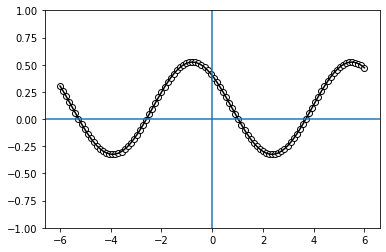

In [84]:
degree = 1  # degree of the target function
coeffs = [0.15 + 0.15j]*degree  # coefficients of non-zero frequencies
coeff_0 = 0.1  # coefficient of zero frequency
data_points = 100  # number of datas
scale_target = 1.  # scale_target of the data

def target_function(x):
    res = 0.0 + 0.0j
    for idx, coeff in enumerate(coeffs):
        exponent = np.complex128((idx+1) * 1j * scale_target * x)
        conj_coeff = np.conjugate(coeff)
        res += coeff * np.exp(exponent) + conj_coeff * np.exp(-exponent)
    return np.real(res + coeff_0)

x = np.linspace(-6, 6, data_points, requires_grad=False)
target_y = np.array([target_function(x_) for x_ in x], requires_grad=False)

plt.plot(x, target_y, color='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.ylim(-1, 1)
plt.axvline(0.0)
plt.axhline(0.0)
plt.show()


My first code block went smooth! The import and variable declaration is fine and all, yet there might be a small detail asking for a sharp attention. It's the fifth variable 'scale_target' declared to $1$. If this is anything but $1$ then the loss is huge and the trainable model all of the sudden becomes untrainable. This is what authors precisely meant is the account between the expressivity and the data encoding strategy. 

Better yet, define a 'scale_train' and set it to $1$. Now as long as the difference between 'scale_target' and 'scale_train' remains $0$ the model is trainable otherwise if not.

Next, I'll make a trainable model to train it! I hope to successfully replicate authors argument in following codes. 

In [85]:
scale_train_model = 1
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def quantum_model(weights, x):

    for (idx, theta) in enumerate(weights):

        ''' This is trainable circuit block. theta_tensor is the tensor containing the weights. The value of weights adjusts to approach the target function as close as possible. The updates happen batchwise. 
        
        The Rot method in qml is the general rotation operator which takes in three parameters theta, phi and a phase. '''
        qml.Rot(theta[0], theta[1], theta[2], wires=0)

        ''' This is encoding gate. It's a roation gate, if x = pi then this is a pauli X-gate '''
        if (idx == len(weights) -1):
            continue
        
        qml.RX(scale_train_model*x, wires=0)

    return qml.expval(qml.PauliZ(wires=0))


The 'weights' is a tensor. In this single-qubit case, it a $1\times3$ row matrix. In a n-qubit model it's $n\times3$ matrix. The three sticks around because 'Rot' method in the class 'qml' takes in exact three parameters. Moreover, the quantum model returns an expectation value for the Pauli Z-gate. Since Hadamard gate is never applied throught the entire model the Pauli Z-gate has no effect like that of an Identity operator/matrix. Well almost! Except for an additional phase of $\pi$ when operated on the state/qubit $|1>. 

$$\sigma_z|1> = e^{i\pi}|1>$$ 

Yet, this difference won't impact the measurement since the phase term is cancelled out by its conjugate during the measurement operation. So, for all the intend of measurement Pauli Z-gate has no effect! As simple as:

$$
<1|\sigma_z^{\dagger}\sigma_z|1> = <1|e^{-i\pi}e^{i\pi}|1>
$$
$$
\therefore <1|\sigma_z^{\dagger}\sigma_z|1> = <1|1> 
$$

I must mention there're nice places to play with qubits [8] [9]. The websites provide a visual and dataful experience. 

In the next code snippet, I have built a random trainable model. After it's visualized it's time to begin the long awaited training!

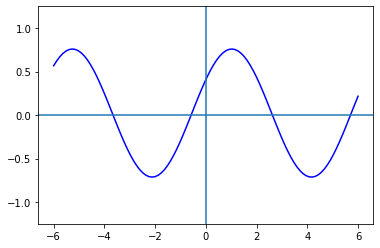

In [86]:
# number of times the encoding gets repeated (here equal to the number of layers)
r = 1

# some random initial weights
weights = 2 * np.pi * np.random.random(size=(r+1, 3), requires_grad=True)

x = np.linspace(-6, 6, data_points, requires_grad=False)
random_quantum_model_y = [quantum_model(weights, x_) for x_ in x]

plt.plot(x, random_quantum_model_y, color='blue')
plt.ylim(-1.25, 1.25)
plt.axvline(0.0)
plt.axhline(0.0)
plt.show()


In [87]:
print(qml.draw(quantum_model)(weights, x[-1]))

 0: ──Rot(2.35, 5.97, 4.6)──RX(6)──Rot(3.76, 0.98, 0.98)──┤ ⟨Z⟩ 



In [88]:
def cost(weights, x, y):
    predictions = [quantum_model(weights, x_) for x_ in x]
    return square_loss(y, predictions)

# max_steps = 150
# opt = qml.AdamOptimizer(stepsize=0.25)
# batch_size = 30

max_steps = 120
opt = qml.AdamOptimizer(stepsize=0.4)
batch_size = 40

cost_ = [cost(weights, x, target_y)]

for step in range(max_steps):

    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # Update the weights by one optimizer step
    weights, _, _ = opt.step(cost, weights, x_batch, y_batch)

    # Save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cost_.append(c)
    
    if (step + 1) % 15 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))


Cost at step  15: 0.0722666231955169
Cost at step  30: 0.011944659602031369
Cost at step  45: 0.0008478812775901242
Cost at step  60: 0.0009749460834098915
Cost at step  75: 0.00012814578078917135
Cost at step  90: 3.678618857270698e-05
Cost at step 105: 1.664770666812511e-05
Cost at step 120: 5.637304497008881e-07


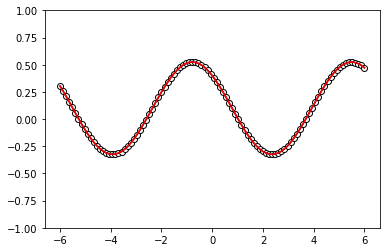

In [89]:
predictions = [quantum_model(weights, x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='red')
plt.ylim(-1,1)
plt.show()

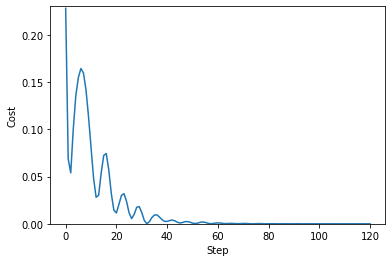

In [90]:
plt.plot(range(len(cost_)), cost_)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.ylim(0, 0.23)
plt.show()

## References

1. Schuld, Maria, Ryan Sweke, and Johannes Jakob Meyer. "Effect of data encoding on the expressive power of variational quantum-machine-learning models." Physical Review A 103.3 (2021): 032430.

2.  Weisstein, Eric W. "Fourier Series." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/FourierSeries.html 

3. Yepez, J. (2013). Lecture notes: Qubit representations and rotations. Phys 711 Topics in Particles &amp; Fields. Retrieved February 15, 2022, from https://www.phys.hawaii.edu/~yepez/Spring2013/lectures/Lecture1_Qubits_Notes.pdf 

4. Physics Stack Exchange. 2019. Exponential of the Pauli matrices. [online] Available at: <https://physics.stackexchange.com/questions/457882/exponential-of-the-pauli-matrices> [Accessed 15 February 2022].

5. Weisstein, Eric W. "Eigen Decomposition." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/EigenDecomposition.html 

6. The Math3ma Institute. (2018, November). The tensor product, demystified. Math3ma. Retrieved February 16, 2022, from https://www.math3ma.com/blog/the-tensor-product-demystified

7.  Rowland, Todd. "Vector Space Tensor Product." From MathWorld--A Wolfram Web Resource, created by Eric W. Weisstein. https://mathworld.wolfram.com/VectorSpaceTensorProduct.html 

8. https://quantum-computing.ibm.com/composer

9. https://javafxpert.github.io/grok-bloch/

10. Schuld, M., Sweke, R. and Meyer, J., 2022. GitHub - XanaduAI/expressive_power_of_quantum_models. [online] GitHub. Available at: <https://github.com/XanaduAI/expressive_power_of_quantum_models> [Accessed 18 February 2022]